# House Prediction Model

## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Loading the datasets 

In [10]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


## Exploring the Data

In [15]:
print(train_df.head(10))
print(train_df.describe())
print(train_df.info())
print(test_df.head(10))
print(test_df.describe())
print(test_df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

## check for missing values and duplicates if any

In [36]:
missing = train_df.isnull().sum()
print(missing.head(10))
drop_cols = missing[missing > 0.5 * len(train_df)].index.tolist()
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)
train_df.duplicated(subset='Id')
test_df.duplicated(subset='Id')

Id             0
MSSubClass     0
MSZoning       0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
dtype: int64
[]


0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 1459, dtype: bool

In [38]:
train_df

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 74 columns]

In [45]:
#Seperating numerical and categorical columns
num_cols = train_df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols1 = test_df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = train_df.select_dtypes(exclude=['int64','float64']).columns.tolist()
cat_cols1 = test_df.select_dtypes(exclude=['int64','float64']).columns.tolist()

## Imputing NaN values in numerical columns with median and categorical columns with mode

In [49]:
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols1] = test_df[num_cols1].fillna(test_df[num_cols1].median())
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[cat_cols1] = test_df[cat_cols1].fillna(test_df[cat_cols1].mode().iloc[0])

## Showing cleaned Data Summary

In [54]:
print(train_df.isnull().sum()) # Should be 0
print(train_df.describe())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64
                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
c

## Feature and Target Selection

In [57]:
y_train = train_df['SalePrice']
X_train = train_df.drop(columns=['Id', 'SalePrice'])
X_test = test_df.drop(columns=['Id'])

num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols1 = X_test.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=['int64','float64']).columns.tolist()
cat_cols1 = X_test.select_dtypes(exclude=['int64','float64']).columns.tolist()

In [65]:
# Encoding the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols1])

# Standardization of numerical features
sc = StandardScaler()
X_train_num = sc.fit_transform(X_train[num_cols])
X_test_num = sc.transform(X_test[num_cols1])

In [67]:
# Combining the processed Features
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))

print(f'Processed Training Features: {X_train_processed.shape}')
print(f'Processed Test Features: {X_test_processed.shape}')

Processed Training Features: (1460, 265)
Processed Test Features: (1459, 265)


## Model Training

In [70]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [90]:
# Predictions on Training Data for Evaluation
y_train_pred = model.predict(X_train_processed)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Training R2 Score: {train_r2:.4f}')
print(f'Accuracy: {train_r2 * 100:.2f}')

# Predictions on Test Data
y_test_pred = model.predict(X_test_processed)


Training RMSE: 21010.24
Training R2 Score: 0.9300
Accuracy: 93.00


In [98]:
#cross validation score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_processed, y_train, cv=kf, scoring ='r2')
rmse_scores = -cross_val_score(model, X_train_processed, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f'Cross-Validated R2 Scores: {scores}')
print(f'Average R2 Score: {np.mean(scores):.4f}')


Cross-Validated R2 Scores: [-2.18022971e+17 -1.75532722e+18 -1.26503711e+17 -2.46112316e+19
 -2.40288116e+17]
Average R2 Score: -5390274728339271680.0000


In [81]:
submission = pd.DataFrame({
'Id': test_df['Id'],
'SalePrice': y_test_pred
})

submission.to_csv('house_price_submission.csv', index=False)


## Visualizations 

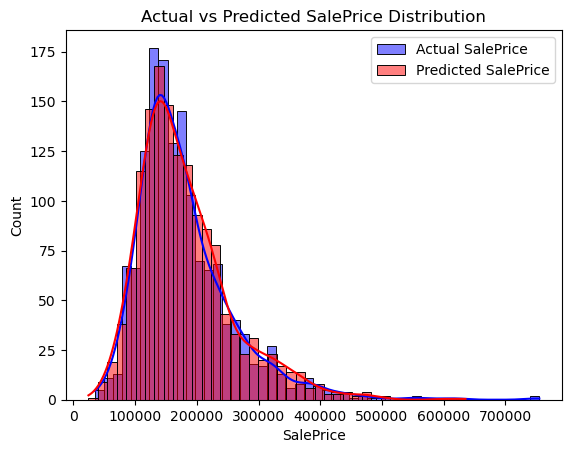

In [83]:
sns.histplot(y_train, color='blue', label='Actual SalePrice', kde=True)
sns.histplot(y_train_pred, color='red', label='Predicted SalePrice', kde=True)
plt.title('Actual vs Predicted SalePrice Distribution')
plt.legend()
plt.show()